In [3]:
#!pip install yfinance

In [1]:
import eikon as ek  # the Eikon Python wrapper package
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [ ]:
mean = 0
std_dev = 1

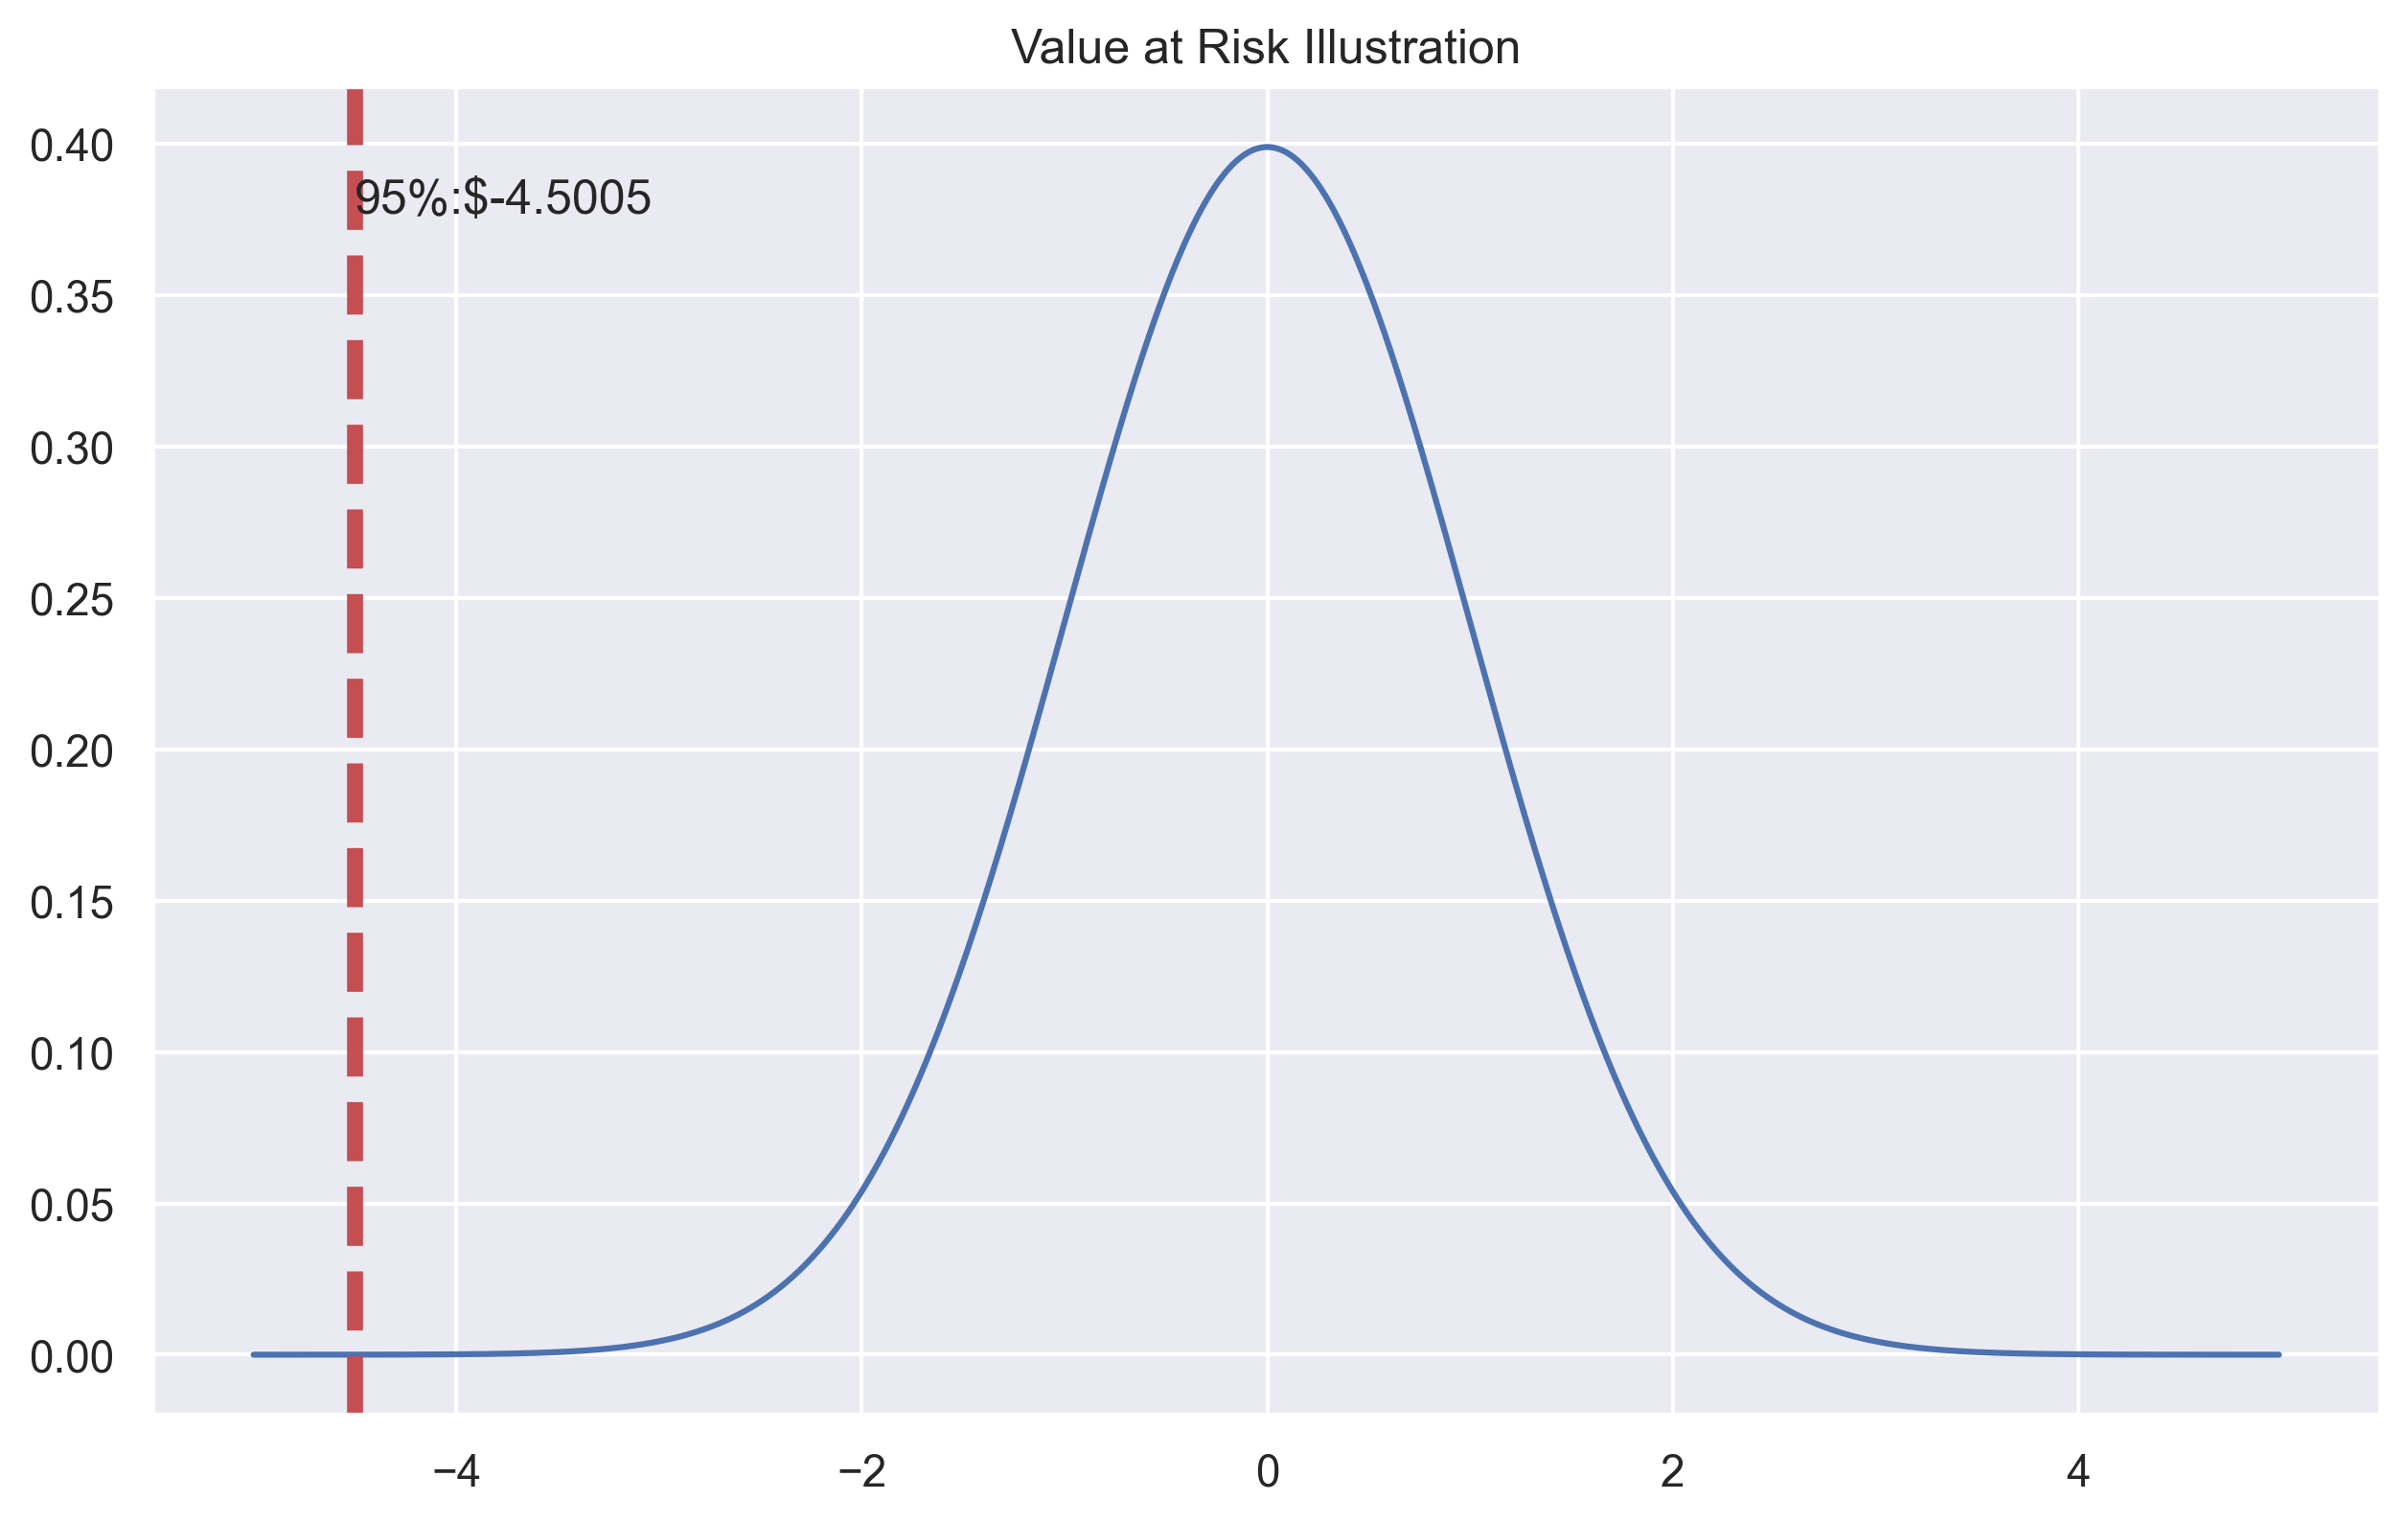

In [4]:
mean = 0
std_dev = 1
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, mean, std_dev)
pdf = plt.plot(x, y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 5), max_ylim * 0.9, '95%:${:.4f}'
         .format(np.percentile(x, 5)))
plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed',
            linewidth=4)
plt.title('Value at Risk Illustration')
plt.show()

In [40]:
from datetime import datetime, timedelta
today = datetime.today()
past = today - timedelta(days=(365*5))
print(today, past)
stocks = ek.get_timeseries(["IBM", "MSFT.O", "NVDA.O"], start_date = past, end_date = today, fields='CLOSE', interval="daily")
stocks

2024-05-02 16:45:49.171623 2019-05-04 16:45:49.171623


CLOSE,IBM,MSFT.O,NVDA.O
Date,,,
2020-05-13,110.54113,179.75,77.8
2020-05-14,111.70643,180.53,80.305
2020-05-15,111.735085,183.16,84.9075
2020-05-18,116.109736,184.91,87.5025
2020-05-19,114.896678,183.63,88.055
...,...,...,...
2024-04-26,167.13,406.32,877.35
2024-04-29,167.43,402.25,877.57
2024-04-30,166.2,389.33,864.02


## Variance-Covariance Method

In [41]:
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()
stocks_returns

CLOSE,IBM,MSFT.O,NVDA.O
Date,,,
2020-05-14,0.010487,0.00433,0.03169
2020-05-15,0.000256,0.014463,0.055731
2020-05-18,0.038405,0.009509,0.030105
2020-05-19,-0.010502,-0.006946,0.006294
2020-05-20,0.009021,0.010994,0.018509
...,...,...,...
2024-04-26,-0.010594,0.018079,0.059924
2024-04-29,0.001793,-0.010067,0.000251
2024-04-30,-0.007373,-0.032646,-0.015561


In [42]:
stocks_returns_mean = stocks_returns.mean()
weights  = np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [43]:
weights

array([0.44290693, 0.08394161, 0.47315146])

In [44]:
print(stocks_returns_mean)
print(weights)
print(cov_var)
print(port_std) 

CLOSE
IBM       0.000399
MSFT.O    0.000795
NVDA.O    0.002403
dtype: float64
[0.44290693 0.08394161 0.47315146]
CLOSE        IBM    MSFT.O    NVDA.O
CLOSE                               
IBM     0.000220  0.000065  0.000083
MSFT.O  0.000065  0.000301  0.000373
NVDA.O  0.000083  0.000373  0.001027
0.018564477767765857


In [45]:
weights = [.2,.3,.4]

In [46]:
#posiciones = ([12000, 1500, 300, 600, 234])
#precios = [12.3, 324, 243,23 ]
#valor_total = precios * posiciones = [144123, 5423]
#valor_portafolios = sum(valor_total)
#weights = array([0.15892504, 0.19353163, 0.64754333])

In [47]:
stocks_returns_mean = stocks_returns.mean()
stocks_returns_mean

CLOSE
IBM       0.000399
MSFT.O    0.000795
NVDA.O    0.002403
dtype: float64

In [48]:
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

AttributeError: 'list' object has no attribute 'T'

In [49]:
port_std

0.018564477767765857

In [50]:
1e6

1000000.0

In [51]:
initial_investment = 1e6
conf_level = 0.95

In [52]:
alpha = norm.ppf(.05, stocks_returns_mean, port_std)

In [53]:
alpha

array([-0.03013677, -0.02974057, -0.02813278])

In [54]:
stocks.columns

Index(['IBM', 'MSFT.O', 'NVDA.O'], dtype='object', name='CLOSE')

In [55]:
len(stocks.columns)

3

In [56]:
for i, j in zip(stocks.columns, range(len(stocks.columns))):
    VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
    print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))

Parametric VaR result for IBM is 30136.77225991839 
Parametric VaR result for MSFT.O is 29740.570392768364 
Parametric VaR result for NVDA.O is 28132.784741046373 


In [22]:
for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
        print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))

Parametric VaR result for IBM is 20052.508588727447 
Parametric VaR result for MSFT.O is 20176.459969997057 
Parametric VaR result for NVDA.O is 16690.922644407954 


In [57]:
def VaR_parametric(initial_investment, conf_level):
    alpha = norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
        print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))
    VaR_param = (initial_investment - initial_investment * (1 + alpha))
    print('--' * 25)
    return VaR_param

In [58]:
VaR_param = VaR_parametric(initial_investment, conf_level)
VaR_param

Parametric VaR result for IBM is 30136.77225991839 
Parametric VaR result for MSFT.O is 29740.570392768364 
Parametric VaR result for NVDA.O is 28132.784741046256 
--------------------------------------------------


array([30136.77225992, 29740.57039277, 28132.78474105])

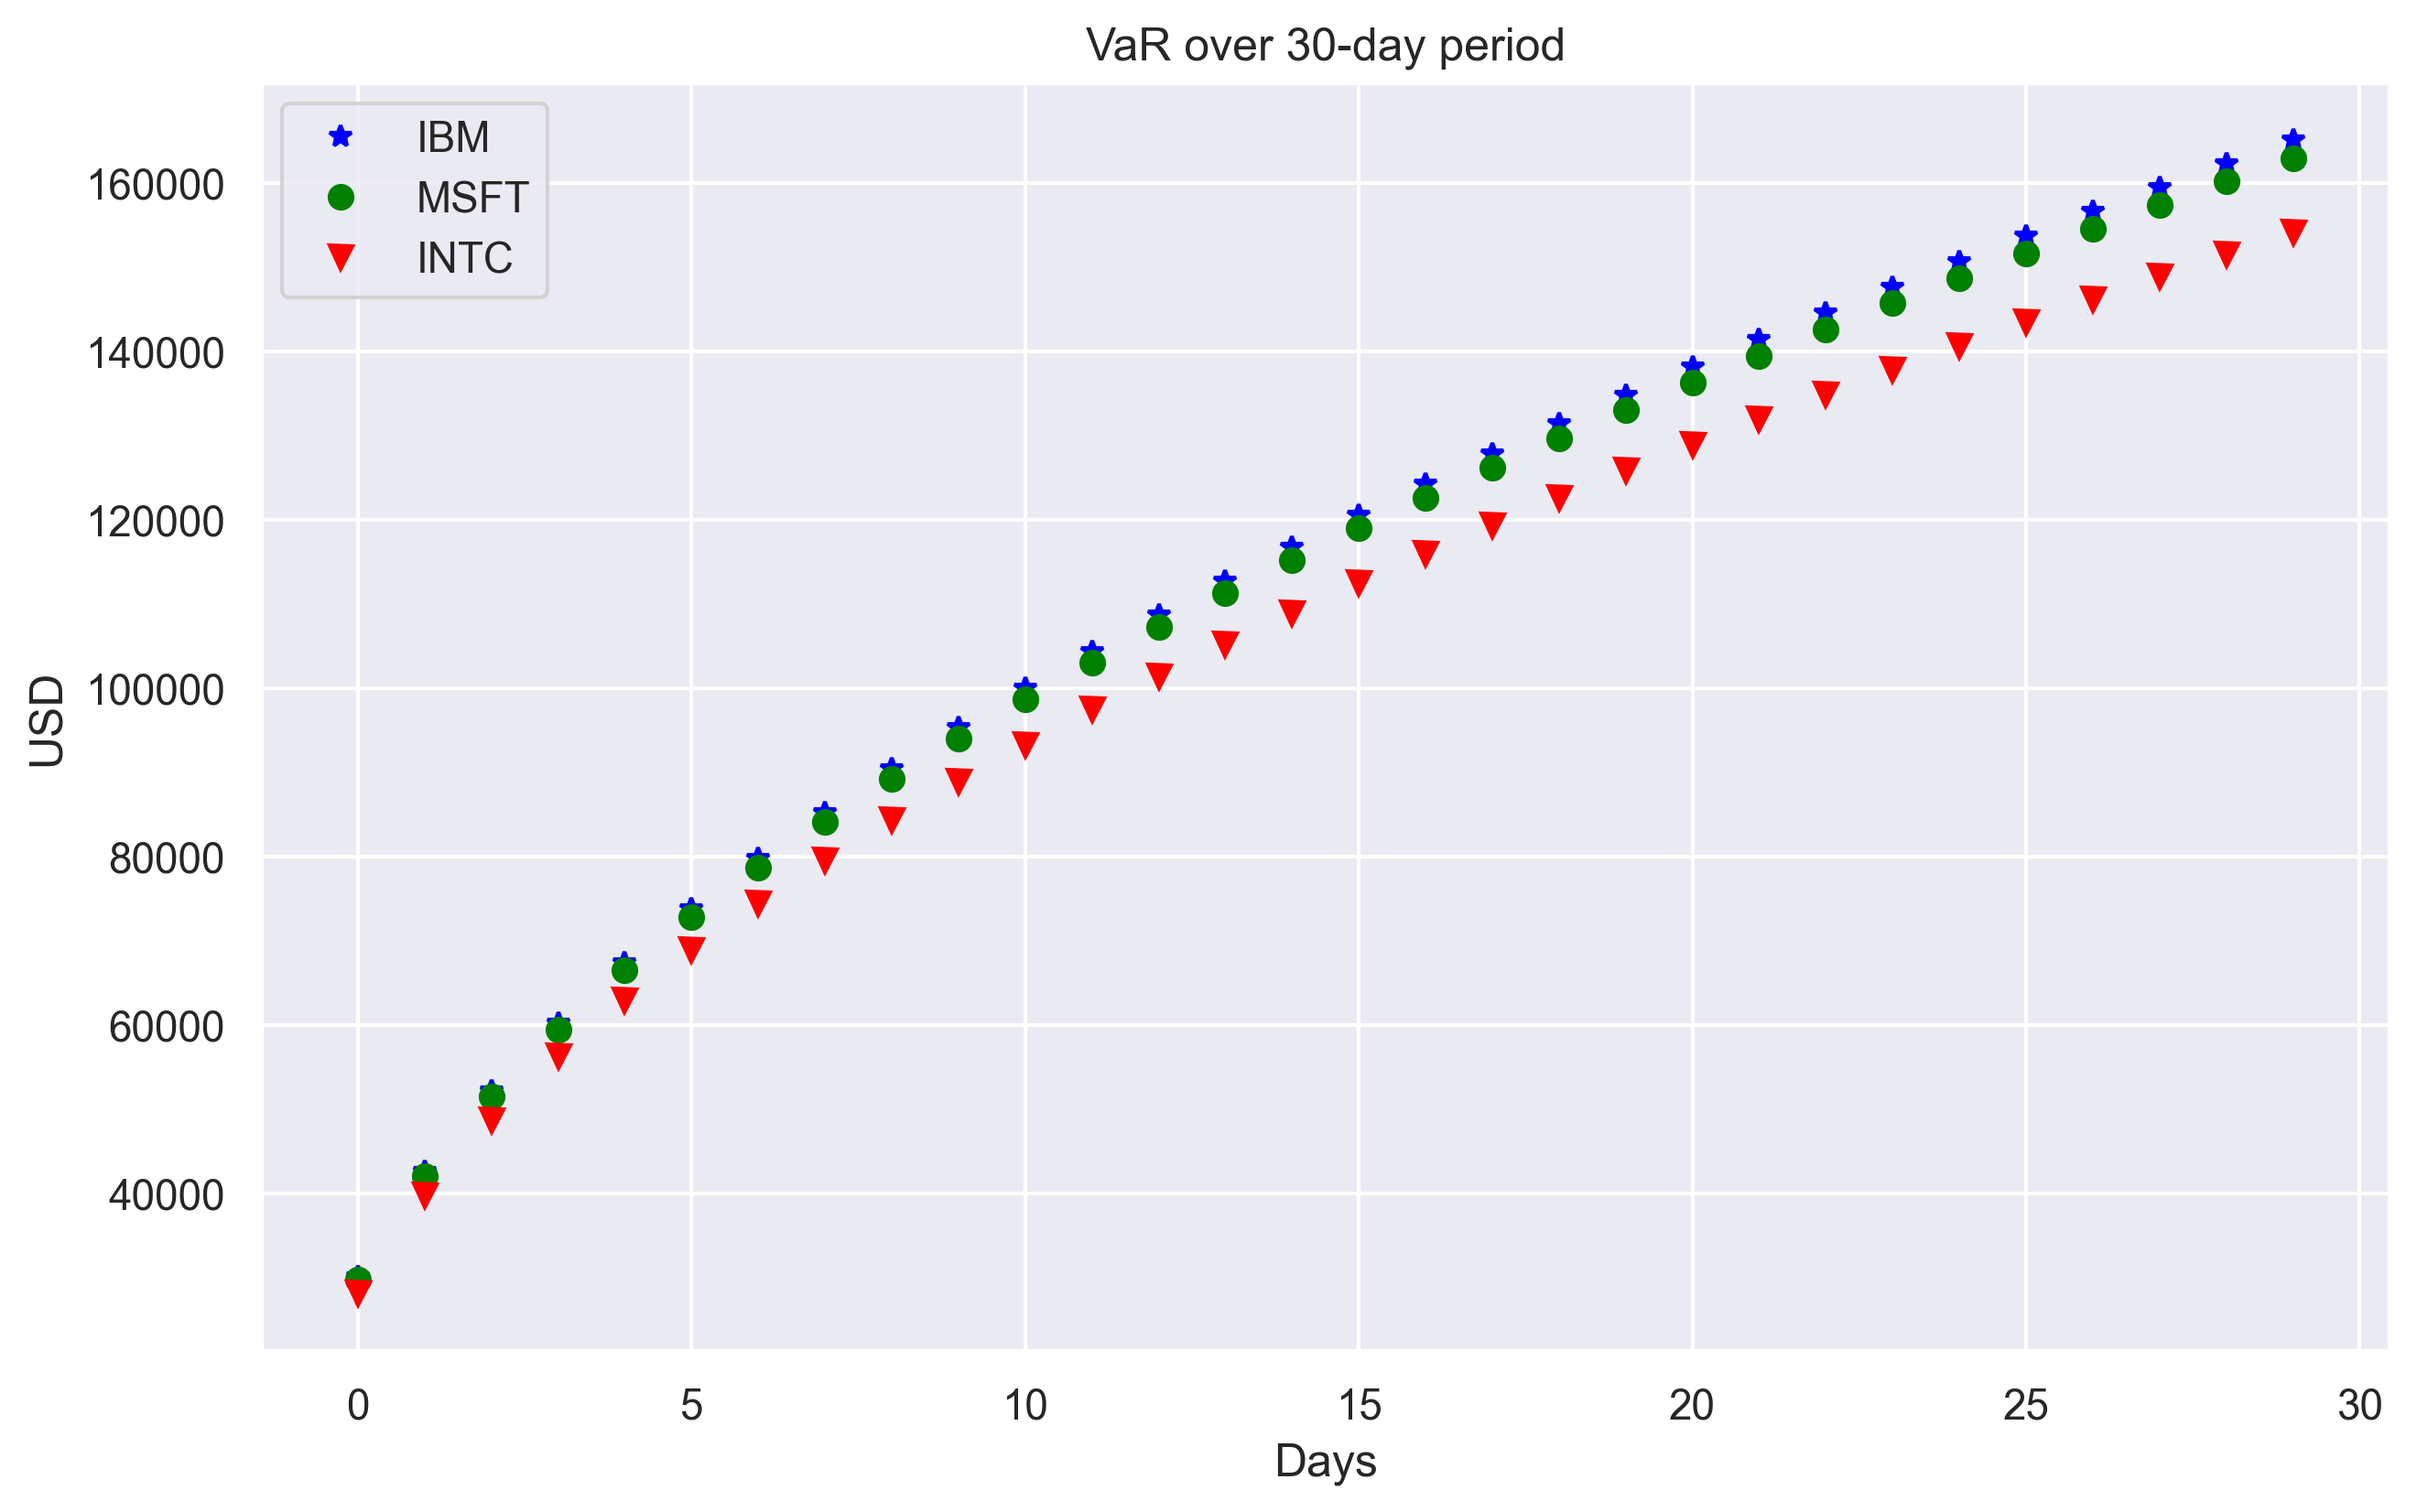

In [59]:
var_horizon = []
time_horizon = 30
for j in range(len(stocks_returns.columns)):
    for i in range(1, time_horizon + 1):
        var_horizon.append(VaR_param[j] * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], "o",
         c='blue', marker='*', label='IBM')
plt.plot(var_horizon[time_horizon:time_horizon + 30], "o",
         c='green', marker='o', label='MSFT')
plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], "o",
         c='red', marker='v', label='INTC')
plt.xlabel("Days")
plt.ylabel("USD")
plt.title("VaR over 30-day period")
plt.legend()
plt.show()

## Historical Simulation VaR

In [60]:
for i, j in zip(stocks_returns.columns,
                    range(len(stocks_returns.columns))):
    print(np.percentile(stocks_returns.loc[:, i], 5))

-0.020175924213847105
-0.02746146899525801
-0.047971836484866956


In [64]:
stocks_returns

CLOSE,IBM,MSFT.O,NVDA.O
Date,,,
2020-05-14,0.010487,0.00433,0.03169
2020-05-15,0.000256,0.014463,0.055731
2020-05-18,0.038405,0.009509,0.030105
2020-05-19,-0.010502,-0.006946,0.006294
2020-05-20,0.009021,0.010994,0.018509
...,...,...,...
2024-04-26,-0.010594,0.018079,0.059924
2024-04-29,0.001793,-0.010067,0.000251
2024-04-30,-0.007373,-0.032646,-0.015561


In [62]:
np.percentile(stocks_returns.loc[:, 'IBM'], 5)

-0.020175924213847105

In [63]:
def VaR_historical(initial_investment, conf_level):
    Hist_percentile95 = []
    for i, j in zip(stocks_returns.columns,
                    range(len(stocks_returns.columns))):
        Hist_percentile95.append(np.percentile(stocks_returns.loc[:, i],
                                               5))
        print("Based on historical values 95% of {}'s return is {:.4f}"
              .format(i, Hist_percentile95[j]))
        VaR_historical = (initial_investment - initial_investment *
                          (1 + Hist_percentile95[j]))
        print("Historical VaR result for {} is {:.2f} "
              .format(i, VaR_historical))
        print('--' * 35)

In [30]:
VaR_historical(initial_investment,conf_level)

Based on historical values 95% of IBM's return is -0.0169
Historical VaR result for IBM is 16924.01 
----------------------------------------------------------------------
Based on historical values 95% of MSFT.O's return is -0.0256
Historical VaR result for MSFT.O is 25633.21 
----------------------------------------------------------------------
Based on historical values 95% of NVDA.O's return is -0.0379
Historical VaR result for NVDA.O is 37852.13 
----------------------------------------------------------------------


In [35]:
weights

array([0.37394996, 0.21452257, 0.41152747])

## Monte Carlo VaR

In [65]:
x = np.random.uniform(-1, 1, 100) 
y = np.random.uniform(-1, 1, 100)

In [66]:
x

array([-0.31672416, -0.4901609 , -0.72864482,  0.15422473, -0.56549955,
       -0.70504192,  0.30695167,  0.37146439, -0.87515699,  0.97091761,
       -0.12451024,  0.47757966, -0.83537659, -0.77583759, -0.79536618,
        0.8492046 , -0.37421697, -0.36872044, -0.15259378, -0.88469261,
        0.16208546, -0.11631696, -0.03808539,  0.00296121, -0.90338236,
        0.05489026, -0.29809418, -0.05721902, -0.59487955,  0.30434867,
       -0.24772545, -0.95490129,  0.63380317,  0.86896934,  0.3343495 ,
       -0.19602961,  0.35684709,  0.93863618, -0.1170987 ,  0.07476175,
       -0.70162527,  0.05907248, -0.99404639, -0.54193324,  0.99215563,
       -0.46567003,  0.71858856, -0.76671858, -0.08394847,  0.36209066,
        0.46618646,  0.91942836, -0.44582397, -0.30005707,  0.14467656,
        0.11129721, -0.93254634,  0.50589491, -0.68664255,  0.69373803,
        0.23947366, -0.85752161, -0.57788464, -0.55743031, -0.1448455 ,
       -0.32323905,  0.21872245, -0.58328908,  0.10515654,  0.44

In [67]:
sample = 100    
def pi_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i] ** 2 + y[i] ** 2) <= 1:
            point_inside_circle += 1 
    print('pi value is {}'.format(4 * point_inside_circle/sample))

In [68]:
pi_calc(x,y)

pi value is 3.0


In [69]:
x = np.random.uniform(-1, 1, 1000000)
y = np.random.uniform(-1, 1, 1000000)

In [70]:
x

array([-0.37375621, -0.93875464, -0.24248053, ...,  0.56515918,
        0.36605323,  0.4918452 ])

In [71]:
sample = 1000000   

def pi_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i] ** 2 + y[i] ** 2) < 1:
            point_inside_circle += 1 
    print('pi value is {:.2f}'.format(4 * point_inside_circle/sample))

In [72]:
pi_calc(x,y)

pi value is 3.14


In [73]:
len(stocks.columns)

3

In [74]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
    print(i)

0
1
2


In [75]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
    mean = np.random.randn(n).mean()
    std = np.random.randn(n).std()
    temp = pd.DataFrame(np.random.normal(mean, std, num_reps))
    sim_data = pd.concat([sim_data, temp], axis=1)
sim_data.columns = ['Simulation 1', 'Simulation 2', 'Simulation 3']

In [76]:
sim_data

,Simulation 1,Simulation 2,Simulation 3
0,0.491322,-0.075823,-0.141065
1,-0.818056,0.977820,0.462286
2,0.792977,-0.001532,-0.504156
3,-2.203138,-0.089181,1.135208
4,-0.657058,0.346531,0.070741
...,...,...,...
995,-0.437026,0.826164,-1.178015
996,-1.450712,-0.686229,-0.276793
997,1.623414,0.421785,0.156454
998,0.668889,0.304481,-1.375568


In [77]:
MC_percentile95 = []
for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
    print(i,j)

Simulation 1 0
Simulation 2 1
Simulation 3 2


In [78]:
def MC_VaR(initial_investment, conf_level):
    MC_percentile95 = []
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        MC_percentile95.append(np.percentile(sim_data.loc[:, i], 5))
        print("Based on simulation 95% of {}'s return is {:.4f}"
              .format(i, MC_percentile95[j]))
        VaR_MC = (initial_investment - initial_investment * 
                  (1 + MC_percentile95[j]))
        print("Simulation VaR result for {} is {:.2f} "
              .format(i, VaR_MC))
        print('--' * 35)

In [79]:
MC_VaR(initial_investment, conf_level)

Based on simulation 95% of Simulation 1's return is -1.5154
Simulation VaR result for Simulation 1 is 1515364.34 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 2's return is -1.6015
Simulation VaR result for Simulation 2 is 1601549.68 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 3's return is -1.8491
Simulation VaR result for Simulation 3 is 1849064.81 
----------------------------------------------------------------------
